# EDA (Exploratory Data Analysis)
다양한 각도에서 데이터를 관찰하고 이해하는 과정입니다. 데이터의 이해도가 높아지면서 숨겨진 의미를 발견하고 잠재적인 문제를 미리 발견할 수 있습니다. 이를 바탕으로 데이터를 보완하거나 기존의 가설을 수정할 수 있습니다. 

<div class="alert alert-block alert-success">
    <b>목표</b> : 주택가격과 관련 있는 Factor를 찾는다. 
</div>

데이터를 1) 전처리한 후 분포를 2) 시각화하고 3) 다양한 기준으로 주택 가격을 분석해 보세요.
- 데이터를 분류한 근거를 글로 남겨주세요.

In [ ]:
!pip install xlrd==1.2.0
import pandas as pd
from pandas import DataFrame
import platform
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumBarunGothic')
import matplotlib.font_manager as fm
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'NanumBarun' in f.name]

[('NanumBarunGothic', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'),
 ('NanumBarunGothic',
  '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf')]

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

데이터 살펴보기

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Toy Project/BostonHousing.xls')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


| 변수 | 설명 |
| ---- | ---- |
| CRIM | 1인당 범죄율 | 
| ZN | 25,000 평방피트를 초과하는 거주지역의 비율 | 
| INDUS | 비소매상업지역 면적 비율 |
| CHAS | 찰스강의 경계에 위치한 경우 1, 아니면 0 |
| NOX | 일산화질소 농도 | 
| RM | 방의 수 |
| AGE | 1940년 이전에 건축된 주택의 비율 |
| DIS | 직업센터까지의 접근성 지수 |
| RAD | 고속도로까지의 접근성 지수 |
| TAX | 재산세율 | 
| PTRATIO | 학생-교사 비율 |
| B | 흑인 비율 |
| LSTAT | 하위 계층 비율 | 
| MEDV | 본인 소유의 주택 가격 (중앙값), 단위 1,000$ |
| CAT.MEDV | MEDV가 30,000을 넘으면 1 아니면 0 |

## 데이터 타입과 결측값 확인하기

In [ ]:
df.info()##데이터프레임의 기본정보를 확인. 모든 열이 506개의 유효값 , 숫자로만 이루어진 데이터값

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  MEDV       506 non-null    float64
 14  CAT. MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [ ]:
df.isna().sum() ## 결측값 확인결과 결측치 없음.

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

In [ ]:
df.corr() ##데이터 상관관계 확인

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.151987
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.365296
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.366276
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.108631
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.232502
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.641265
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.191196
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.118887
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.197924
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.273687


##가격기준으로 상관관계 내림차순으로 분석

In [ ]:
corr_sort = df.corr().loc[:'LSTAT','MEDV'].abs().sort_values(ascending=False) ## 집값과 상관계수가 높은 순서대로 출력 , abs()로 상관계수의값을 양수로 모두 변경 , 내림차순 정렬 
corr_sort
## 상관관계 분석결과  상관계수가 높은순인 위에서 부터 5개를 뽑아보면 
##   LSTAT	(하위 계층 비율), RM (방의 수) ,PTRATIO	(학생-교사 비율) 
##    INDUS(비소매상업지역 면적 비율) , TAX	재산세율이 관계가 있는것을 볼수있다.   

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


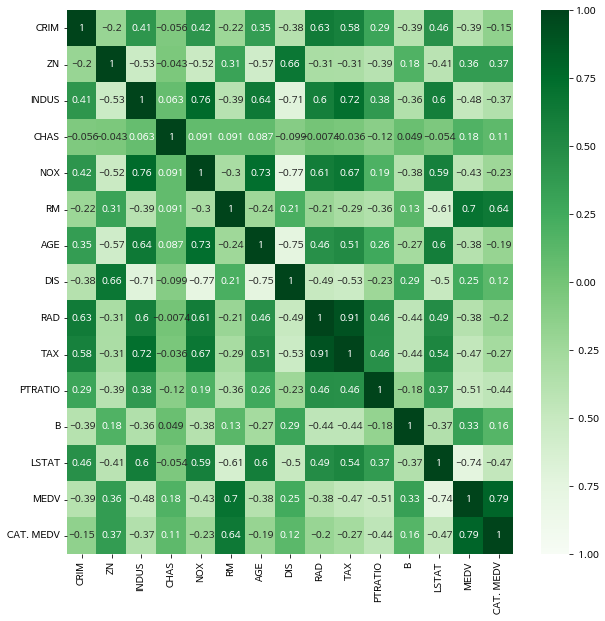

In [ ]:
## 집값 상관계수의 데이터를 히트맵으로 표시해보았다 . 
df.corr(method='pearson')
plt.rcParams["figure.figsize"] = (10,10)
sb.heatmap(df.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

In [ ]:
df.describe() ## decribe() 함수를 이용해 카운트 , 평균 , 표준편차, 최소값 ,최대값 테이블로 출력

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000


# 데이터 분포 확인하기

In [ ]:
##  상관관계 분석결과  상관계수가 높은순인 (MEDV) 기준
##  LSTAT	(하위 계층 비율), RM (방의 수) ,PTRATIO	(학생-교사 비율) 3개와
##  데이터만 봤을때 관계가 높을 것 같은 CHAS (찰스강뷰) , AGE(노후화정도) , DIS(직장근처)
##  이용해 분석을 진행해볼것이다.

## 하위계층과 집값의 관계 , 하위계층이 많으면 집값이 낮아질까?

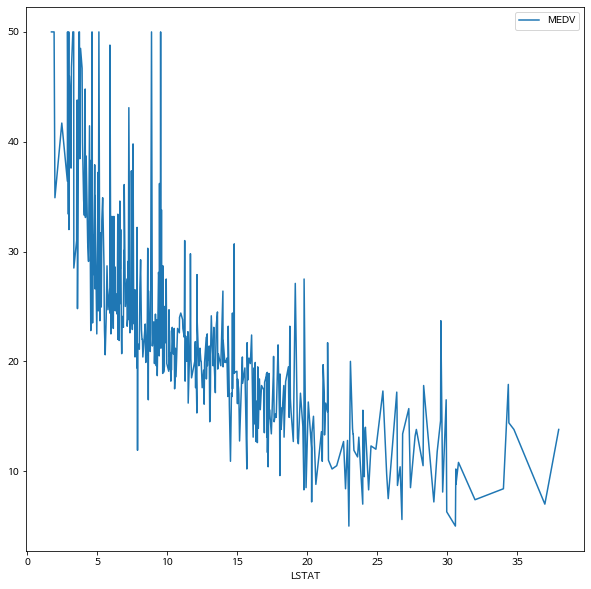

In [ ]:
STAT = pd.pivot_table(data=df, index = ["LSTAT"], values=["MEDV"])
STAT.plot.line()
# 대략적인 그래프 결과
# 하위계층이 적을수록 집값이 높은것을 보아 
# 하위계층이 많을수록 집값이 낮아짐을 알수있다.

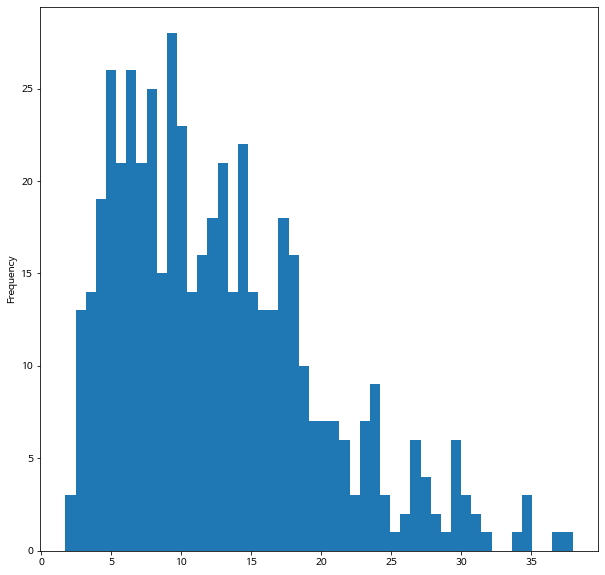

In [ ]:
df['LSTAT'].plot.hist(bins=50)
##하위계층 분포도 

In [ ]:
def func(x):
    if x<=5:
        return "부자촌"
    elif 5<x<=20 :
        return "서민촌"
    else:
        return "빈민촌"
    

df['재산기준'] = df['LSTAT'].map(func)
df
## 하위계층 비율에 따라 "부자촌","서민촌","빈민촌으로" 구분한다.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,재산기준
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,부자촌
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,서민촌
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,부자촌
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,부자촌
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,서민촌
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0,서민촌
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0,서민촌
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0,서민촌
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0,서민촌


In [ ]:
how = {
    "MEDV":np.mean
}
house= df.groupby('LSTAT').agg(how)
## 하위계층을 집값의 평균치로 나눈결과

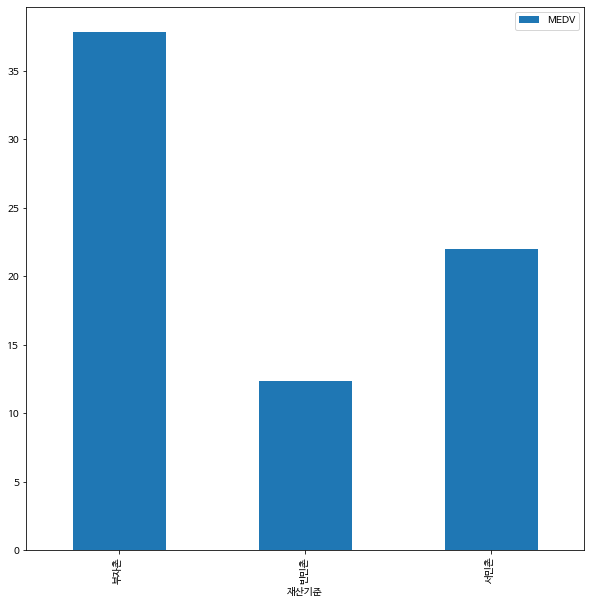

In [ ]:
df.groupby('재산기준').agg(how).plot.bar()
## 그래프 결과 부자촌의 집값은 상당히 높은가격 서민촌은 평균가격, 빈민촌은 낮은가격을 형성하고있다.

- 그래프 결과 하위 계층이적은 부자촌의 집값은 상당히 높은가격 서민촌은 평균가격, 하위 계층이 많은 빈민촌은 낮은가격을 형성하고있다.

##방의 수가 많을수록 집값이 높아질까?

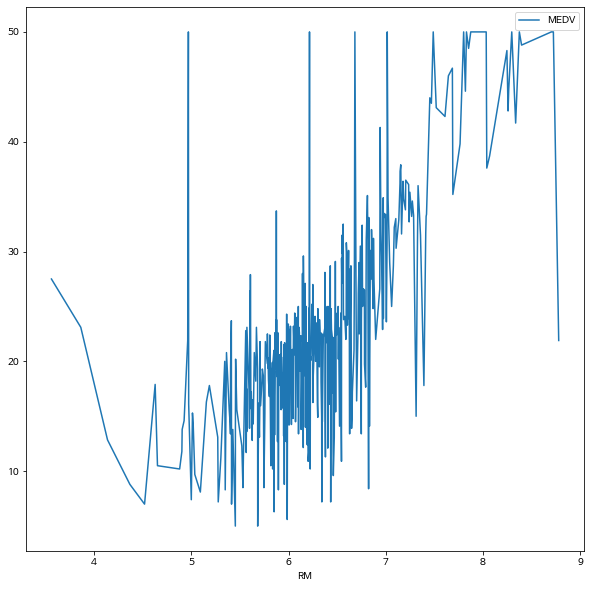

In [ ]:
Room = pd.pivot_table(data=df, index = ["RM"], values=["MEDV"])
Room.plot.line()
# 대략적인 그래프 결과 방의 수가 많을수록 집값이 높다.

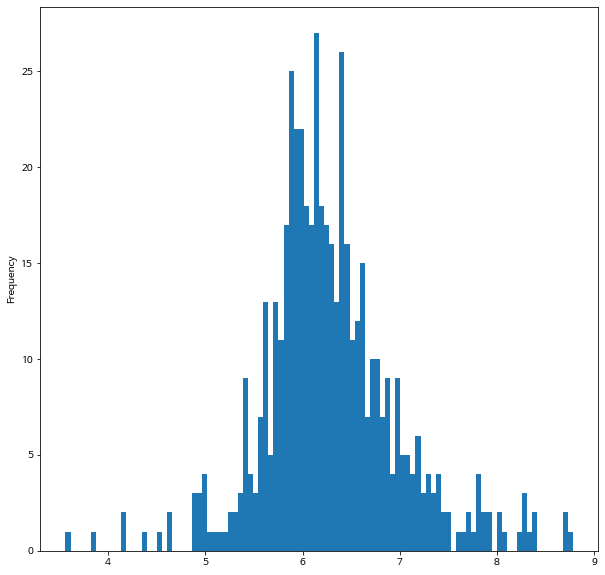

In [ ]:
df['RM'].plot.hist(bins=100)
##방의 갯수 분포도 

In [ ]:
how = {
    "MEDV":np.mean
}
house= df.groupby('RM').agg(how)
## 집값의 평균치로 방의개수를 나눈결과

In [ ]:
def func(x):
    if x<=6:
        return "작은집"
    elif 7>x>6:
        return "보통집"
    elif x>7 :
        return "큰집"

df['집크기'] = df['RM'].map(func)
df
#방의 mean 값인 6을 기준으로 6보다 작으면 작은집 7보다 크면 큰집으로 나누었다.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,재산기준,집크기,뷰,거리
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,부자촌,보통집,시티뷰,멀다
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,서민촌,보통집,시티뷰,멀다
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,부자촌,큰집,시티뷰,멀다
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,부자촌,보통집,시티뷰,멀다
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,서민촌,큰집,시티뷰,멀다
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0,서민촌,보통집,시티뷰,보통이다
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0,서민촌,보통집,시티뷰,보통이다
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0,서민촌,보통집,시티뷰,보통이다
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0,서민촌,보통집,시티뷰,보통이다


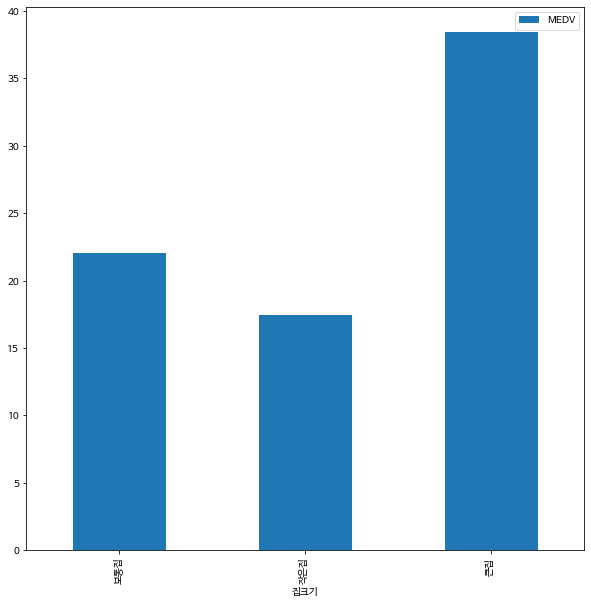

In [ ]:
df.groupby('집크기').agg(how).plot.bar()
## 작은집과 큰집의 가격차이 그래프이다

- 방의 개수가많은 큰집이 확연히 집값이 높은것을 볼수있다.

##학생 - 교사들이 많이 사는곳일수록 집값은 어떠한가?

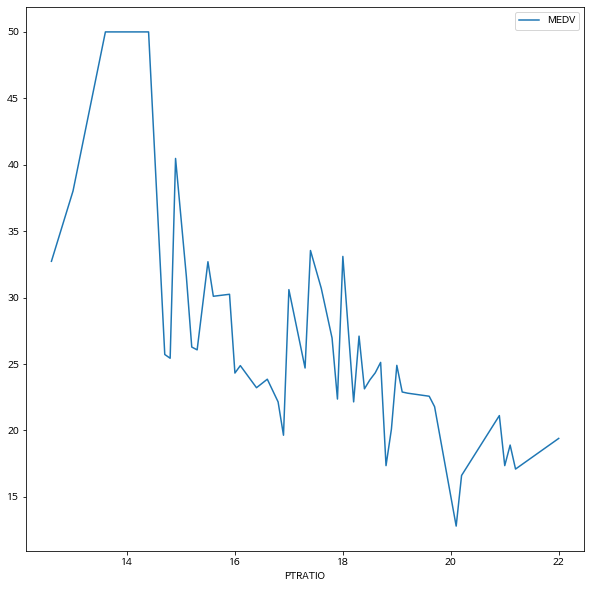

In [ ]:
School = pd.pivot_table(data=df, index = ["PTRATIO"], values=["MEDV"])
School.plot.line()
## 대략적인 그래프 결과 많은비율의 학생- 교사들은 집값이 낮은곳에 거주하고있다

## 찰스강 주변 집값은 어떠한가 ?

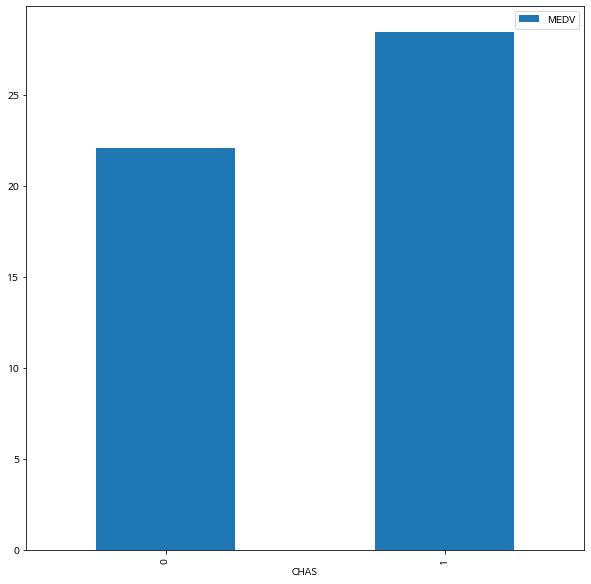

In [ ]:
river = pd.pivot_table(data=df, index =["CHAS"], values=["MEDV"])
river.plot.bar()
## 대략적인 그래프 결과 찰스강 주변집값은 비교적으로 높다.

In [ ]:
def view(x):
    if x == 1:
        return "리버뷰"
    elif x == 0:
        return "시티뷰"
    
df['뷰']= df['CHAS'].map( view )
df.head()
# "1"은 강근처 리버뷰 "0" 은 시티뷰로 명명한다.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,재산기준,집크기,뷰
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,부자촌,None,시티뷰
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,서민촌,None,시티뷰
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,부자촌,큰집,시티뷰
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,부자촌,None,시티뷰
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,서민촌,큰집,시티뷰


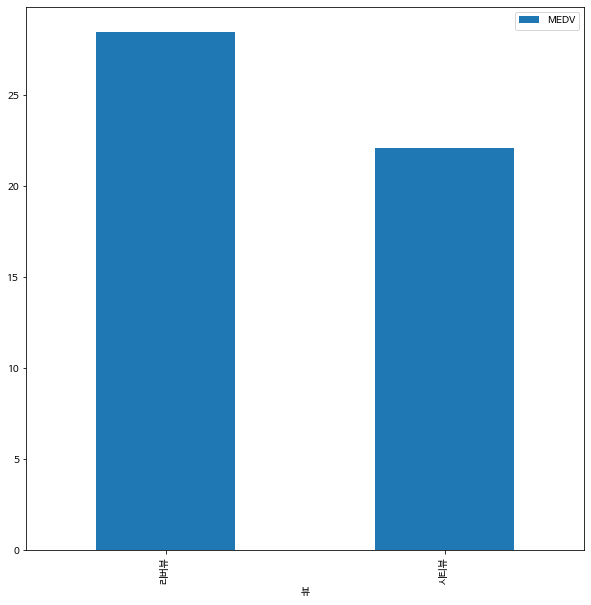

In [ ]:
how = {
    "MEDV":np.mean
}
df.groupby('뷰').agg(how).plot.bar()
## 리버뷰와 시티뷰를 집값의 평균으로 나눈값

- 찰스강 주변 집값이 상대적으로 높은것을 확인할수있다.

## 집이 노후할수록 집값은 어떠한가?

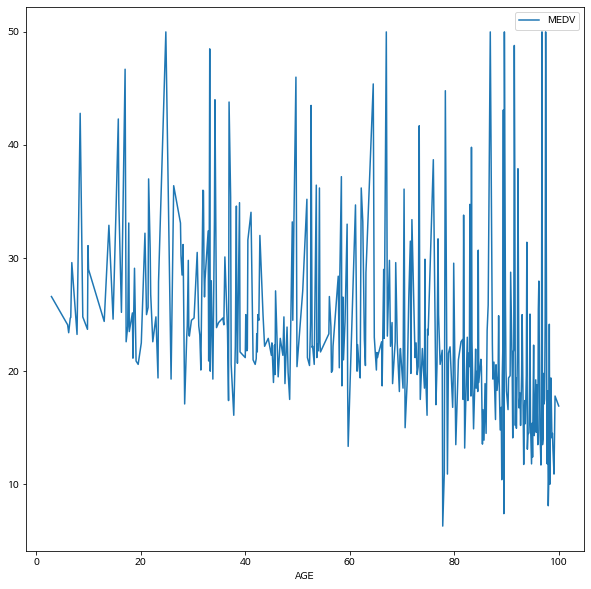

In [ ]:
old = pd.pivot_table(data=df, index = ["AGE"], values=["MEDV"])
old.plot.line()
## 대략적인 그래프결과 노후한 집일수록 집값이 낮다.

## 회사가 가까울수록 집값은 어떠한가?

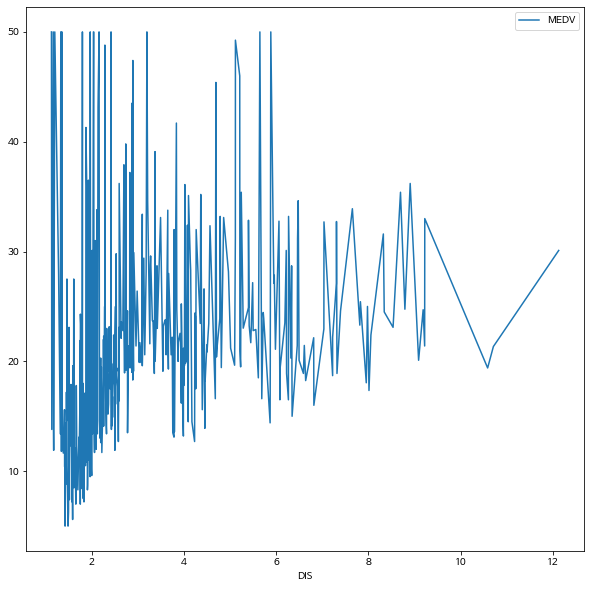

In [ ]:
city = pd.pivot_table(data=df, index = ["DIS"], values=["MEDV"])
city.plot.line()
## 대략적인 그래프결과 보스턴 시 회사와의 거리가 가까울수록 집값이 높아진다.

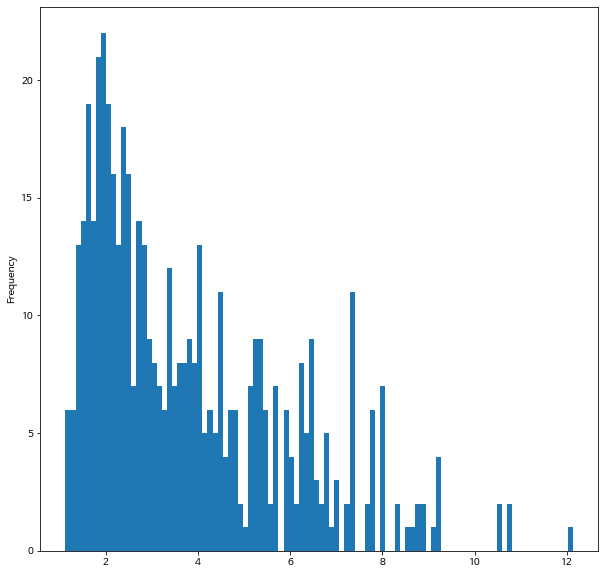

In [ ]:
df['DIS'].plot.hist(bins=100)
## 회사접근성 분포도 

In [ ]:
def distance(x):
    if x <2:
        return "가깝다"
    elif 4> x >=2 :
        return "보통이다"
    elif 8> x>=4 : 
        return "멀다"
    else:
        return "아주 멀다"
    
df['거리']= df['DIS'].map( distance )
df.head()
# 각 도심으로부터 거리에 따라서 분류하였다.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,재산기준,집크기,뷰,거리
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,부자촌,None,시티뷰,멀다
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,서민촌,None,시티뷰,멀다
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,부자촌,큰집,시티뷰,멀다
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,부자촌,None,시티뷰,멀다
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,서민촌,큰집,시티뷰,멀다


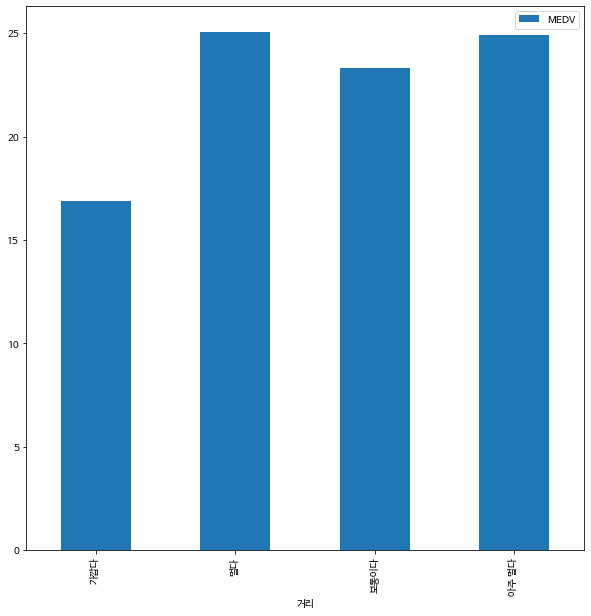

In [ ]:
how = {
    "MEDV":np.mean
}
df.groupby('거리').agg(how).plot.bar()
## 도심으로 거리가 가까움에도 불구하고 집값이 싼 결과를 보여준다 
## 이와 연관이 있을것같은 거리에 따른 일산화탄소 농도와 비교해보자.

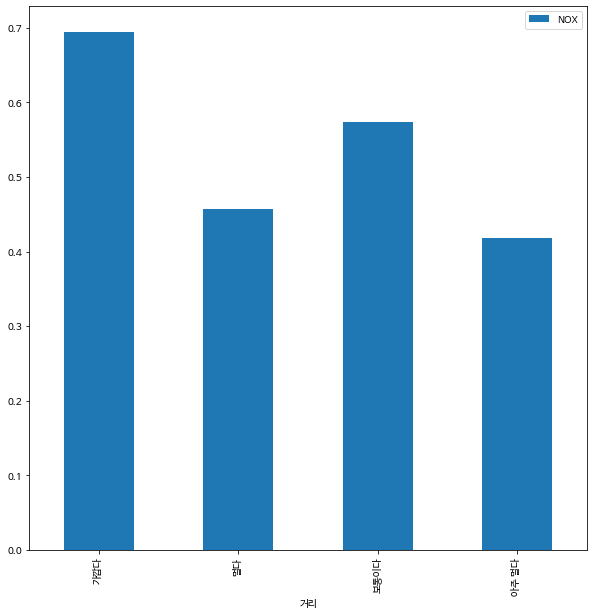

In [ ]:
how = {
    "NOX":np.mean
}
df.groupby('거리').agg(how).plot.bar()
## 도심 거리에따른 일산화탄소 농도를 비교한 결과이다.
## 도심과 가까울수록 일산화탄소 농도가 높은것을 볼수있다.

- 이 결과 도심과 가까워서 집값이 비쌀것으로 예상했지만 , 
 집과 도심이 가까울수록 일산화탄소 농도가 높아져 집값이 낮은것으로 보인다.

 다음으로 일산화탄소 농도와 집값을 비교해보겠다.

### 일산화탄소 농도와 집값의 관계

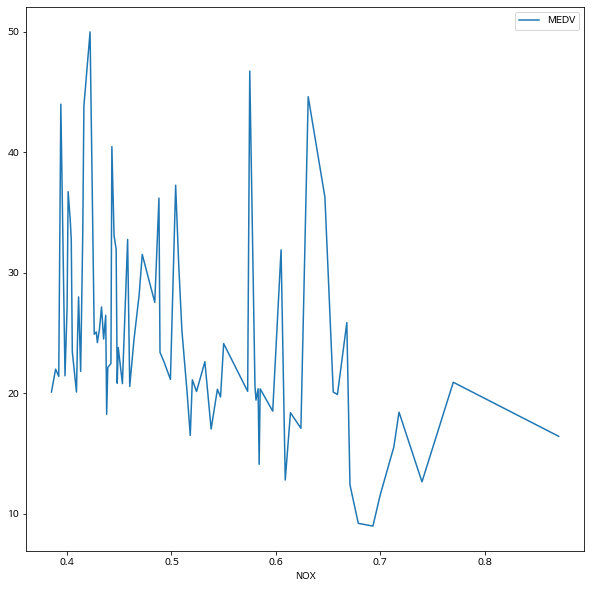

In [ ]:
STAT = pd.pivot_table(data=df, index = ["NOX"], values=["MEDV"])
STAT.plot.line()

대략적인 그래프 결과 일산화탄소 농도가 높아질수록 집값이 낮아지는 경향을보인다.

#데이터 분석 결과

##결과치 분석결과


1.   하위계층이 많을수록 집값 ↓
2.   방의 수가 많을수록 집값 ↑
3.   학생 - 교사들이 많이 사는곳일수록 집값↓
4.   찰스강 주변일수록 집값 ↑
5.   집이 노후할수록 집값 ↓
6.   회사가 가까울수록 집값 ↑ 예상했지만 
     일산화탄소 농도로 인해 집값이 ↓ 경향을 보인다.
      





<div class="alert alert-block alert-success">
<b>채점기준</b> <br>
<ul>
    <li>데이터를 3건이 상의 변수를 분석했는가? </li>
    <li>데이터를 분류한 기준을 논리적으로 정리했는가</li>       
    <li>데이터를 차트로 시각화했는가? </li>
    <li>결과를 분석해서 정리했는가? </li>       
    <li>심도있게 분석했는가? </li>     
</div>